# Tests of Periodogram Averaging Module

In [21]:
import numpy as np
from scipy.signal.spectral import welch
from scipy.signal import periodogram
import matplotlib.pyplot as plt
import sys
# Add the folder path to the sys.path list
sys.path.append('../')
from per_averaging import periodogram_averaging

## Generate random signal

In [22]:
data = np.random.rand(5000)

### Calculate normal periodogram

In [23]:
f_normal, periodogram_normal = periodogram(data, window='hann')

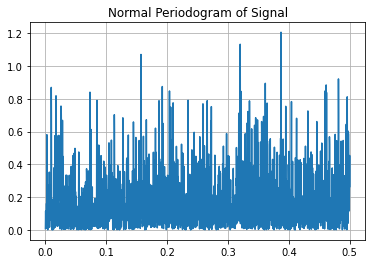

In [24]:
plt.plot(f_normal, periodogram_normal)
plt.title('Normal Periodogram of Signal')
plt.grid()
plt.show()

## Test without overlap

In [25]:
L = 100
N = len(data)
K = 50
D = int(round(N/K))

### Calculate averaged periodogram

In [26]:
# Custom periodogram averaging function
f_manual, manual_averaging = periodogram_averaging(data,K,L, window="hann")

# Scipy periodogram averaging function
f, Pxx = welch(data, nperseg = L, noverlap=L-D,)

### Compare custom function with Scipy function

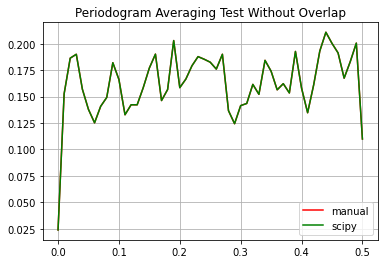

In [27]:
plt.plot(f, manual_averaging, color = 'red', label = 'manual')
plt.plot(f, Pxx, color = 'green', label = 'scipy')
plt.legend()
plt.title('Periodogram Averaging Test Without Overlap')
plt.grid()
plt.show()

## Test with overlap

In [28]:
L2 = 70
K2 = 200
D2 = int(round(N/K2))

### Calculate averaged periodogram

In [29]:
# Custom periodogram averaging function
f_manual, manual_averaging2 = periodogram_averaging(data,K2,L2, window="hann")

# Scipy periodogram averaging function
f2, Pxx2 = welch(data, nperseg = L2, noverlap=L2-D2)

### Compare custom function with Scipy function

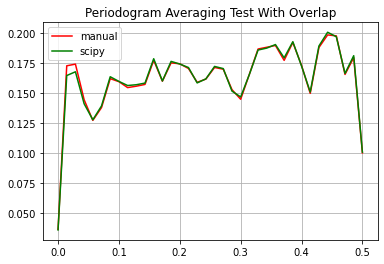

In [30]:
plt.plot(f2, manual_averaging2, color = 'red', label = 'manual')
plt.plot(f2, Pxx2, color = 'green', label = 'scipy')
plt.legend()
plt.title('Periodogram Averaging Test With Overlap')
plt.grid()
plt.show()